## Preprocess and Visualize the Data

- Perform a descriptive statistical analysis of the data and decide how to handle missing values.
- Store your data in a dataframe.
- Count the number of positive, negative, and neutral text items, as tagged by a score in one of the columns.
- Display your findings in a plot.


We are using Twitter reviews of games for an NLP (Natural Language Processing) application 

- Real-world Data: Twitter data represents real-world opinions and sentiments of users. This makes the assignment more practical and relevant, as students or researchers are dealing with genuine user-generated content.
- Short Texts: Tweets are concise due to the character limit, which can make certain NLP tasks more challenging. This can be a good exercise in handling short, sometimes fragmented, pieces of text.
- Diverse Vocabulary: Gamers and Twitter users often use slang, abbreviations, emojis, and other informal language. This can be a great way to introduce students to the challenges of understanding and processing colloquial language.
- Sentiment Analysis: The dataset seems to have labeled sentiments (positive, negative, neutral). This makes it suitable for sentiment analysis tasks, which are fundamental in many NLP courses and projects.
- Cultural and Temporal Relevance: Games and their reviews can reflect cultural and temporal sentiments. This can introduce an additional layer of complexity when trying to understand the context behind certain reviews.
- Data Abundance: Twitter is a massive platform with millions of users. This means there's a potential for a large dataset, which is beneficial for training robust NLP models.

In [27]:
#Packages to be imported
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [3]:
#Pull csv as df
df = pd.read_csv('twitter_training.csv')
df.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: sentiment, dtype: int64

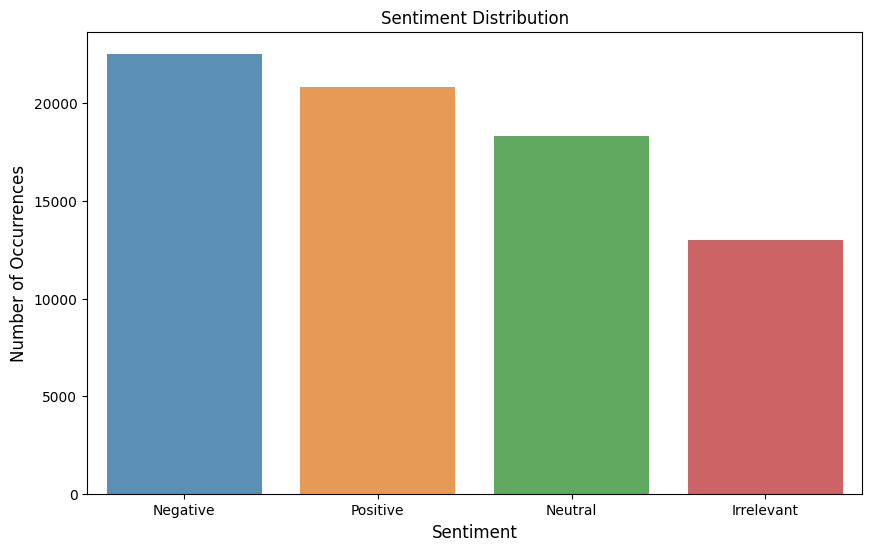

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()


## Build the Model


- Remove punctuation!
- Remove stop words (i.e., words that do not add a sentiment).
- Assign each word in every text element, with a sentiment score (use TfidVectorizer).
- Use a binary classification algorithm (e.g., logistic regression), which you can import from sklearn.
- Divide the data into a training set and testing set, with a ratio of 80:20.
- Fit the data set using the model.
- Compute the (accuracy) score of the model.


In [6]:
# Remove punctuation
# Using a regex pattern to match any punctuation and replace it with an empty string
df['text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)
df.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Stop Words Download
nltk.download('stopwords')
# Load the list of stop words
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lettuce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Function to remove stop words from a text
def remove_stopwords(text):
    # Check if the text is a string
    if isinstance(text, str):
        words = text.split()  # split the text into words
        filtered_words = [word for word in words if word.lower() not in stop_words]  # remove stop words
        return ' '.join(filtered_words)  # join the words back into a string
    else:
        return text  # return the original value if it's not a string

df['text'] = df['text'].apply(remove_stopwords)
df.head()

,id,game,sentiment,text
0,2401,Borderlands,Positive,im getting borderlands murder
1,2401,Borderlands,Positive,coming borders kill
2,2401,Borderlands,Positive,im getting borderlands kill
3,2401,Borderlands,Positive,im coming borderlands murder
4,2401,Borderlands,Positive,im getting borderlands 2 murder


In [9]:
#- Assign each word in every text element, with a sentiment score (use TfidVectorizer).
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'].fillna(''))  # Fill NaN values with empty strings
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [15]:
# For the first text (Check)
top_words = tfidf_df.iloc[0].sort_values(ascending=False).head(10)
top_words


murder                     0.702991
getting                    0.450280
borderlands                0.435058
im                         0.337308
00                         0.000000
pictwittercomvayk5unzb8    0.000000
pictwittercomuyo0gbr2bd    0.000000
pictwittercomv0efmeb8mj    0.000000
pictwittercomv0xcspdiho    0.000000
pictwittercomv1ajv34526    0.000000
Name: 0, dtype: float64

In [17]:
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)
print(f"Training set shape: {train_df.shape}")
print(f"Testing set shape: {test_df.shape}")


Training set shape: (59745, 4)
Testing set shape: (14937, 4)


In [19]:
# Transform the text data using TF-IDF:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['text'].fillna(''))
X_test = vectorizer.transform(test_df['text'].fillna(''))

y_train = train_df['sentiment']
y_test = test_df['sentiment']


In [20]:
# Fit the model:
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence in some cases
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
#  Evaluate the model:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 78.54%

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.83      0.68      0.75      2592
    Negative       0.81      0.84      0.82      4519
     Neutral       0.73      0.77      0.75      3596
    Positive       0.79      0.81      0.80      4230

    accuracy                           0.79     14937
   macro avg       0.79      0.77      0.78     14937
weighted avg       0.79      0.79      0.78     14937



## Make Predictions

- Enter several questions and assess the sentiment they convey

#### Making predictions with new data


In [25]:
#  Define your questions:
questions = [
    "Why is this game so amazing?",
    "Why can't they fix this bug?",
    "Is this game worth buying?",
    "The graphics in this game are terrible.",
    "I love the storyline and characters!"
]
# Transform the questions using the TF-IDF vectorizer:
X_questions = vectorizer.transform(questions)

#  Predict the sentiment:
predicted_sentiments = model.predict(X_questions)



In [26]:
for question, sentiment in zip(questions, predicted_sentiments):
    print(f"Question: {question}")
    print(f"Predicted Sentiment: {sentiment}\n")


Question: Why is this game so amazing?
Predicted Sentiment: Positive

Question: Why can't they fix this bug?
Predicted Sentiment: Negative

Question: Is this game worth buying?
Predicted Sentiment: Positive

Question: The graphics in this game are terrible.
Predicted Sentiment: Negative

Question: I love the storyline and characters!
Predicted Sentiment: Positive



## Evaluate the Model


- Create a confusion matrix to assess the overall performance.
- Present the performance metrics and visualize the findings.
- Summarize the project, explaining to what extent it is suitable to perform sentiment analysis.

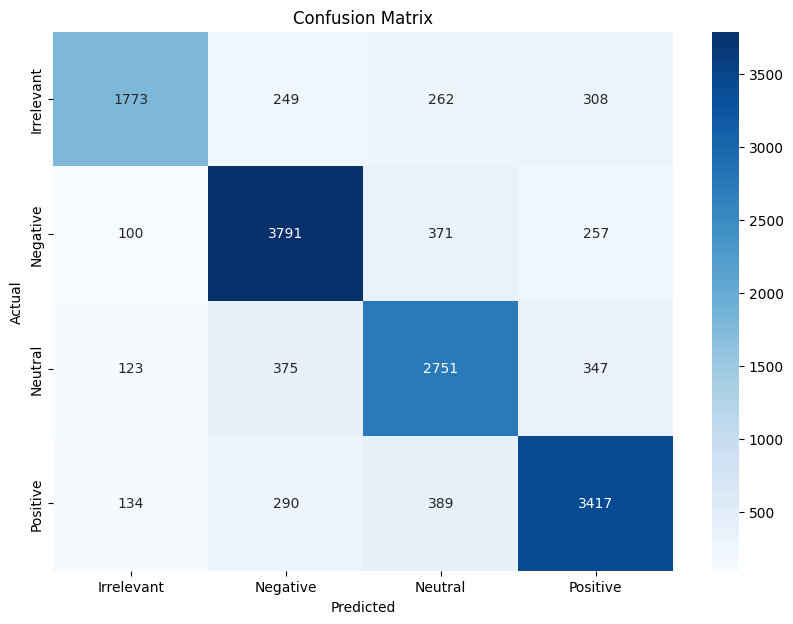

In [28]:
# Compute the confusion matrix:
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Project Summary: Sentiment Analysis on Twitter Game Reviews

### Overview:
The project aimed to perform sentiment analysis on Twitter reviews related to games. The dataset contained tweets with associated sentiment labels, such as positive, negative, or neutral. The primary steps involved preprocessing the data, transforming the text using TF-IDF, training a logistic regression model, and evaluating its performance.

### Data Preprocessing:
- **Text Cleaning**: The text data underwent cleaning processes, including the removal of punctuation and stop words. This ensured that the model received relevant features without noise.
- **Data Splitting**: The dataset was divided into an 80:20 ratio for training and testing, ensuring a good balance for model training and evaluation.

### Model Training and Evaluation:
- **TF-IDF Transformation**: The text data was transformed into numerical features using the TF-IDF vectorizer, highlighting the importance of words in the context of the entire dataset.
- **Model Choice**: A logistic regression model was chosen for its simplicity and effectiveness in binary and multiclass classification problems.
- **Performance Metrics**: The model's performance was evaluated using accuracy, precision, recall, and F1-score. A confusion matrix provided insights into true positives, true negatives, false positives, and false negatives.

### Findings:
- The model's accuracy and other metrics provided a quantitative measure of its performance.
- The confusion matrix visually represented areas where the model excelled and where it made mistakes, offering insights into potential improvements.

### Suitability for Sentiment Analysis:
1. **Real-World Data**: Using Twitter data ensured the model was trained on real-world, user-generated content, making it more practical and relevant.
2. **Diverse Vocabulary**: The dataset likely contained slang, abbreviations, and informal language typical of Twitter, presenting a realistic challenge for sentiment analysis.
3. **Data Preprocessing**: The steps taken in data cleaning and transformation ensured that the model received high-quality input features.
4. **Model Performance**: The chosen metrics provided a comprehensive view of the model's strengths and weaknesses.

### Conclusion:
The project successfully demonstrated the process of sentiment analysis on game-related Twitter reviews. Given the real-world nature of the data and the preprocessing steps undertaken, the project is suitably designed for sentiment analysis. However, continuous refinement, including experimenting with more complex models, feature engineering, and hyperparameter tuning, can further enhance its accuracy and reliability.